In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
sns.set()  # более красивый внешний вид графиков по умолчанию

In [2]:
df = pd.read_csv("../resources/cardio_train.csv", sep=";", index_col=0)
df["age"] = (df["age"] / 365).round()
df["height"] = df["height"] / 100
df["age"] = df["age"].astype(int)  # поменяли тип

In [3]:
df.T

id,0,1,2,3,4,8,9,12,13,14,...,99986,99988,99990,99991,99992,99993,99995,99996,99998,99999
age,50.00,55.00,52.00,48.00,48.00,60.00,61.00,62.00,48.00,54.00,...,41.00,56.00,51.00,54.00,58.00,53.00,62.00,52.00,61.00,56.0
gender,2.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.0
height,1.68,1.56,1.65,1.69,1.56,1.51,1.57,1.78,1.58,1.64,...,1.68,1.59,1.61,1.72,1.65,1.68,1.58,1.83,1.63,1.7
weight,62.00,85.00,64.00,82.00,56.00,67.00,93.00,95.00,71.00,68.00,...,72.00,72.00,56.00,70.00,80.00,76.00,126.00,105.00,72.00,72.0
ap_hi,110.00,140.00,130.00,150.00,100.00,120.00,130.00,130.00,110.00,110.00,...,110.00,130.00,170.00,130.00,150.00,120.00,140.00,180.00,135.00,120.0
ap_lo,80.00,90.00,70.00,100.00,60.00,80.00,80.00,90.00,70.00,60.00,...,70.00,90.00,90.00,90.00,80.00,80.00,90.00,90.00,80.00,80.0
cholesterol,1.00,3.00,3.00,1.00,1.00,2.00,3.00,3.00,1.00,1.00,...,1.00,2.00,1.00,1.00,1.00,1.00,2.00,3.00,1.00,2.0
gluc,1.00,1.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,...,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.0
smoke,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.0
alco,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  float64
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 9.4 MB


## Типы признаков: непрерывные, порядковые и категориальные

cholesterol - порядковый признак

cardio - категориальный признак

age - числовой непрерывный признак

##### Корреляционный анализ данных с числовыми признаками

In [5]:
df_cor = df[[
    "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"
]]

In [6]:
# df_cor=["age","height","weight","ap_hi","ap_lo","cholesterol","gluc"]
# sns.pairplot(df[df_cor]);

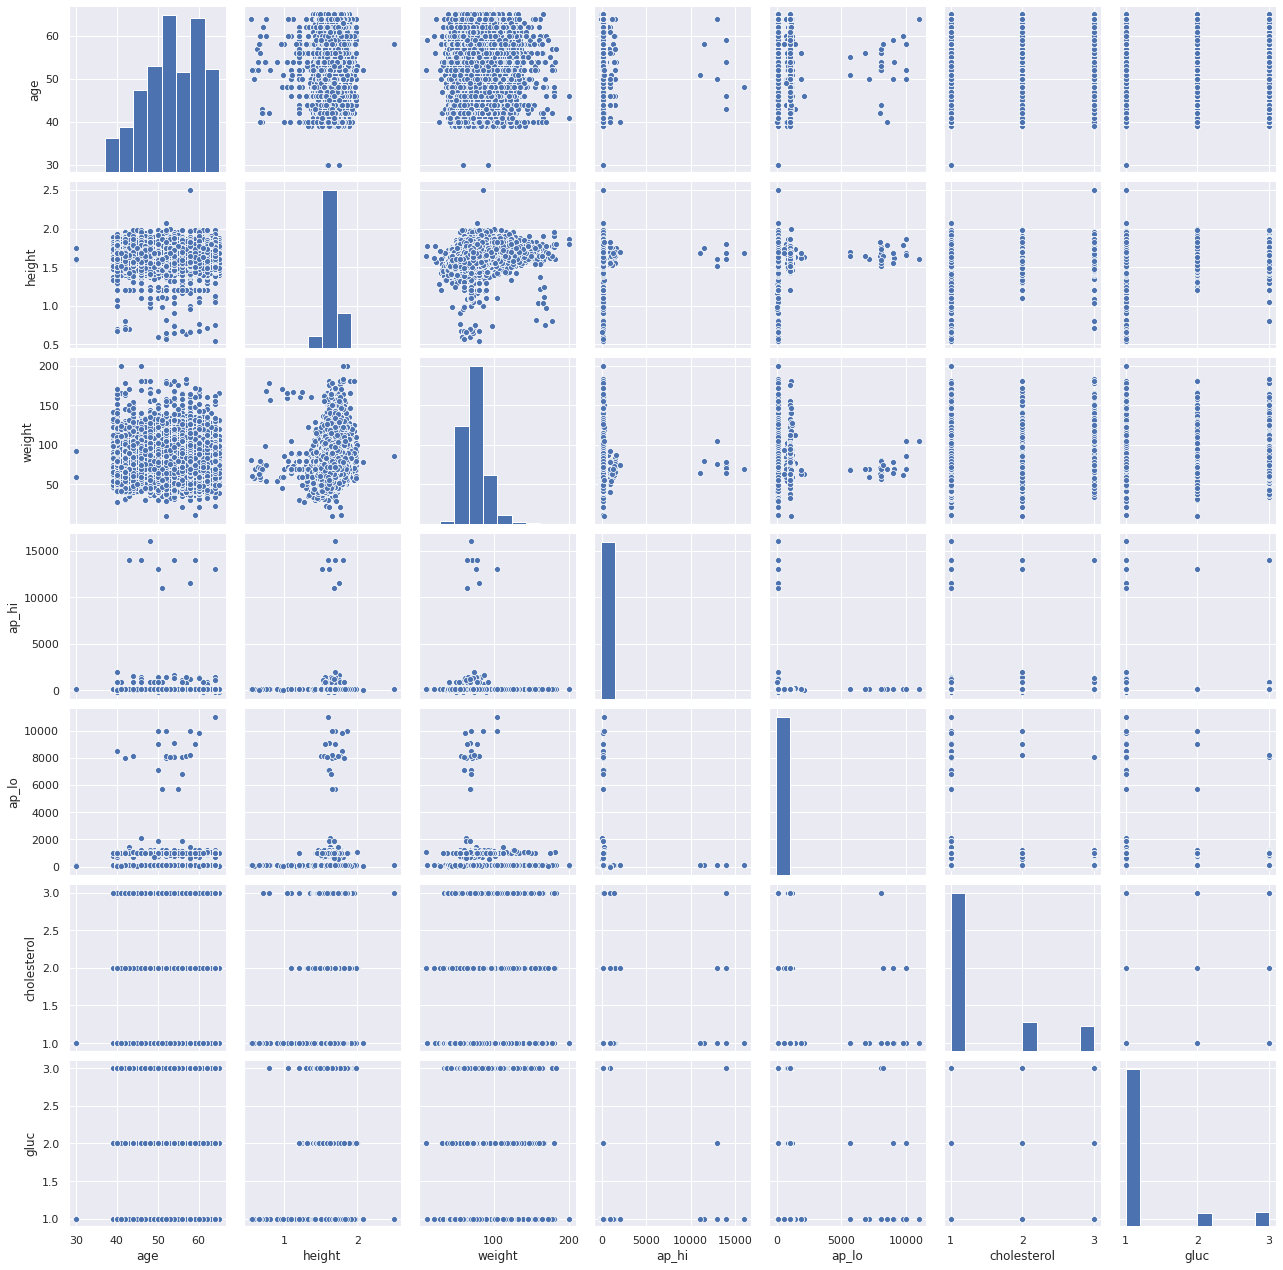

In [7]:
sns.pairplot(df_cor);

###### удаление выбросов

(Выбросы  - Точки, выходящие за пределы трёх сигм - вероятность того, что случайная величина примет значение, отклоняющееся от математического ожидания больше чем на три среднеквадратических отклонения пренебрежимо мала. (mean-3*std & 
mean+3*std))

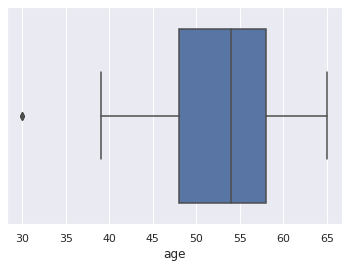

In [8]:
sns.boxplot(df["age"]);

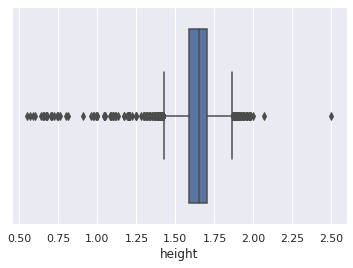

In [9]:
sns.boxplot(df["height"]);

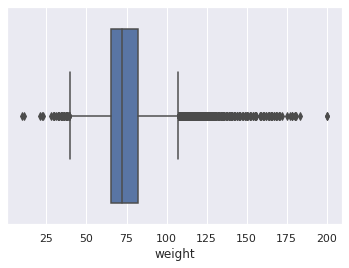

In [10]:
sns.boxplot(df["weight"]);

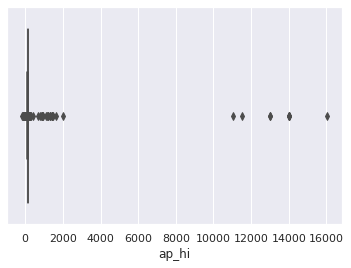

In [11]:
sns.boxplot(df["ap_hi"]);

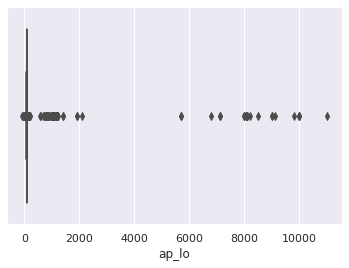

In [12]:
sns.boxplot(df["ap_lo"]);

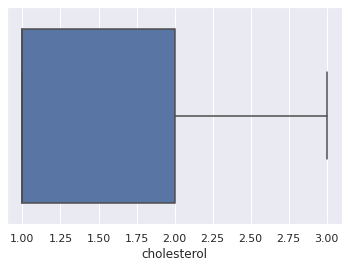

In [13]:
sns.boxplot(df["cholesterol"]);

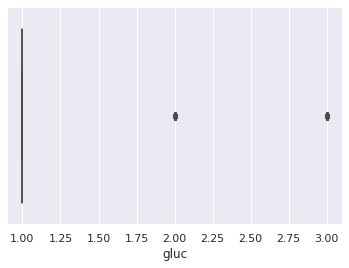

In [14]:
sns.boxplot(df["gluc"]);

In [15]:
def outliers(liter):
    middle = df[liter].mean()
    deviation = df[liter].std()
    return df[(df[liter] < middle - 3 * deviation) |
              (df[liter] > middle + 3 * deviation)].index

In [16]:
wrong_height = outliers("height")
wrong_weight = outliers("weight")
wrong_ap_hi = outliers("ap_hi")
wrong_ap_lo=outliers("ap_lo")

out=set(wrong_height|wrong_weight|wrong_ap_hi|wrong_ap_lo) # Set - Создание неупорядоченной коллекции уникальных элементов.
print(len(out))

1929


In [17]:
df.drop(out,inplace=True) 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68071 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68071 non-null  int64  
 1   gender       68071 non-null  int64  
 2   height       68071 non-null  float64
 3   weight       68071 non-null  float64
 4   ap_hi        68071 non-null  int64  
 5   ap_lo        68071 non-null  int64  
 6   cholesterol  68071 non-null  int64  
 7   gluc         68071 non-null  int64  
 8   smoke        68071 non-null  int64  
 9   alco         68071 non-null  int64  
 10  active       68071 non-null  int64  
 11  cardio       68071 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.8 MB


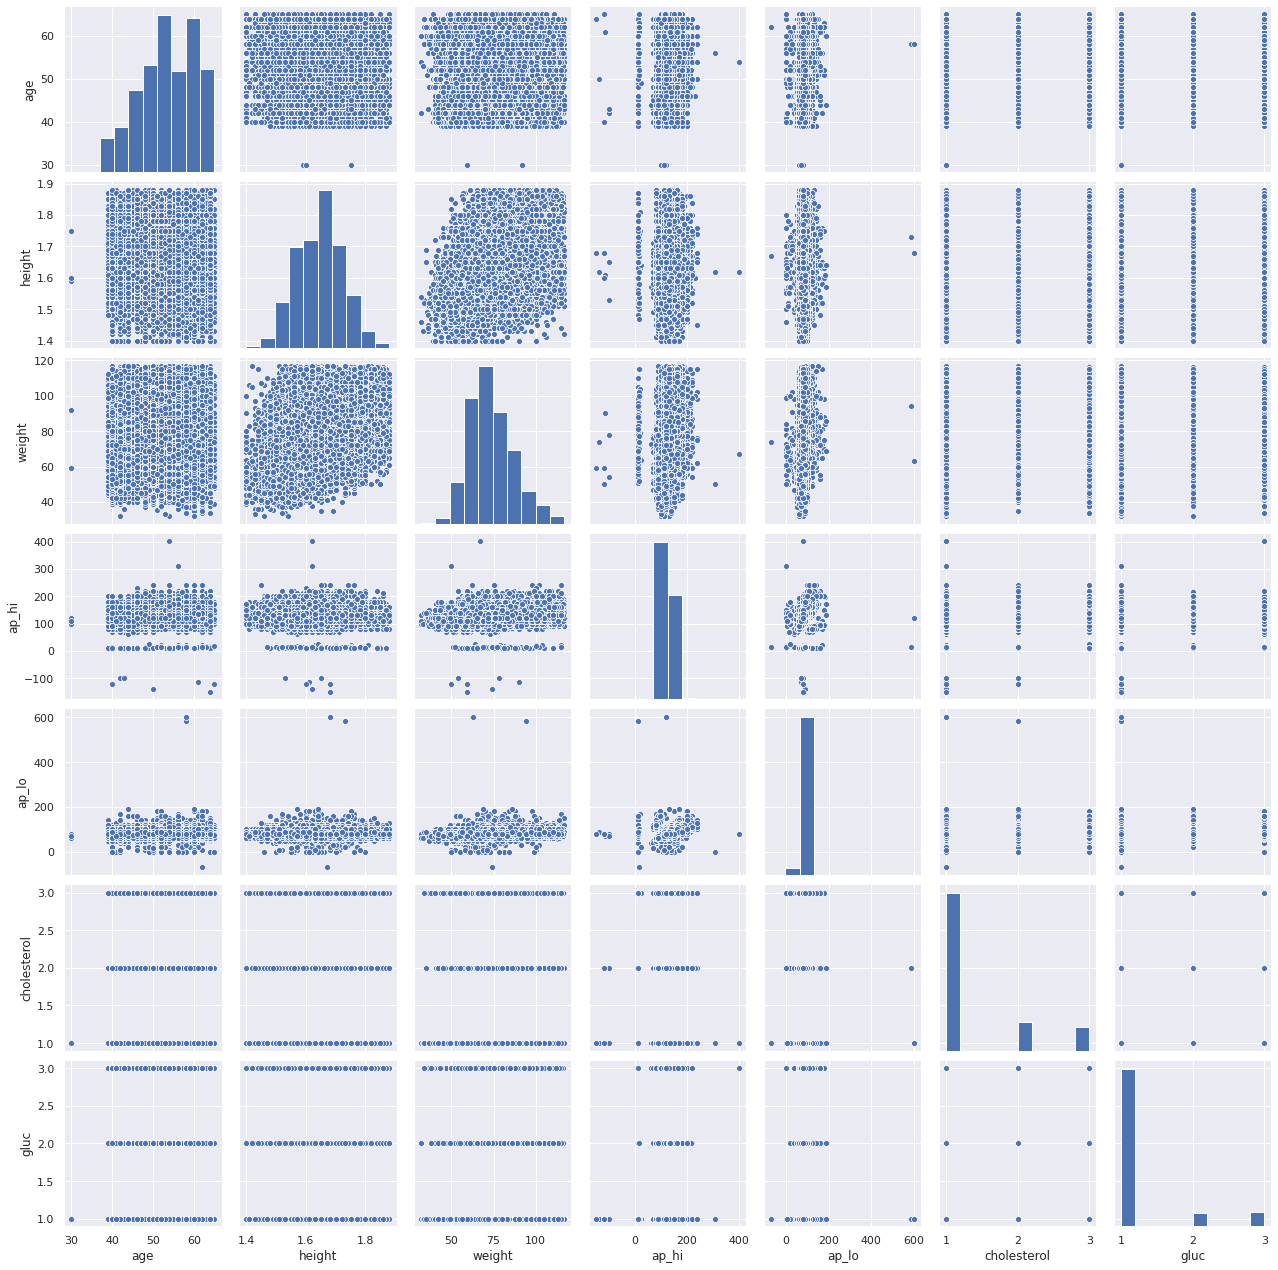

In [19]:
df_cor=["age","height","weight","ap_hi","ap_lo","cholesterol","gluc"]
sns.pairplot(df[df_cor])

###### Матрица корреляций Спирмена для числовых признаков без учёта объектов-выбросов

Корреляция - взаимосвязь при которой изменение одной случайной величины ведёт к закономерному изменению другой случайной величины

Значение коэффициента меняется от −1 (последовательности рангов полностью противоположны) до +1 (последовательности рангов полностью совпадают). Нулевое значение показывает, что признаки независимы.

In [20]:
df[df_cor].corr(method="spearman")

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc
age,1.000000,-0.082183,0.067737,0.225374,0.161482,0.144051,0.092326
height,-0.082183,1.000000,0.312419,0.017144,0.028388,-0.062429,-0.026099
weight,0.067737,0.312419,1.000000,0.269200,0.246267,0.132306,0.103824
ap_hi,0.225374,0.017144,0.269200,1.000000,0.728927,0.205921,0.101733
ap_lo,0.161482,0.028388,0.246267,0.728927,1.000000,0.164351,0.079457
cholesterol,0.144051,-0.062429,0.132306,0.205921,0.164351,1.000000,0.405530
gluc,0.092326,-0.026099,0.103824,0.101733,0.079457,0.405530,1.000000


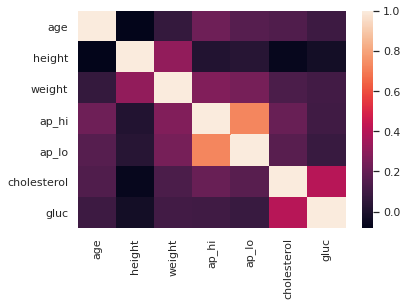

In [21]:
sns.heatmap(df[df_cor].corr(method="spearman"));
# Наибольшая корреляция наблюдается между переменными ap_hi и ap_lo.

### Статистическая значимость корреляций

(насколько высокой должна быть степень корреляции, чтобы можно было вообще говорить о какой-либо неслучайной взаимосвязи между признаками)

###### Коэффициент корреляции Пирсона

In [24]:
from scipy.stats import pearsonr, spearmanr, kendalltau
pearson=pearsonr(df["height"],df["weight"])
print("Pearson correlation:",pearson[0],"p-value:",pearson[1])

Pearson correlation: 0.3142873661362632 p-value: 0.0


Так как p-value < 0.05 (типичное пороговое значение) - корреляция между ростом и весом статистически значима.

In [27]:
teory_height=pearsonr(df["height"],df["ap_hi"])
print("Pearson correlation:",teory_height)
teory_weight=pearsonr(df["weight"],df["ap_hi"])
print("Pearson correlation:",teory_weight)

Pearson correlation: (0.010717520992153989, 0.005169536660391321)
Pearson correlation: (0.2442338337717582, 0.0)


Корреляция давления и роста существенно меньше, чем корреляция давления и веса.

### Анализ корреляций категориальных признаков

Коэффициенты и выводы для категориальных данных строятся на основании таблиц сопряжённости (кросс-таблиц, contingency tables).

In [30]:
pd.crosstab(df["smoke"],df["cardio"])

cardio,0,1
smoke,,
0,31348,30787
1,3175,2761


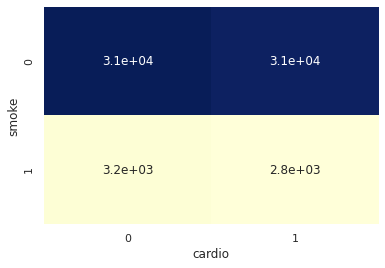

In [32]:
sns.heatmap(pd.crosstab(df["smoke"],df["cardio"]),cmap="YlGnBu",annot=True,cbar=False);

Вычисление коэффициента χ2

In [33]:
from scipy.stats import chi2_contingency, fisher_exact
chi2_contingency(pd.crosstab(df["smoke"],df["cardio"]))

(19.85673527332828,
 8.34681250322075e-06,
 1,
 array([[31512.48850465, 30622.51149535],
        [ 3010.51149535,  2925.48850465]]))

Малое значение p-value говорит о том, что связь статистически подтверждается. В данном случае у курящих людей склонность с ССЗ ниже. 

###### Тест Фишера

In [35]:
fisher_exact(pd.crosstab(df["smoke"],df["cardio"]))

(0.885452245029283, 7.799832072146025e-06)

## Взаимосвязь категориального и числового признаков

Бисериальный коэффициент корреляции

In [38]:
from scipy.stats import pointbiserialr
pointbiserialr(df["cardio"],df["weight"])

PointbiserialrResult(correlation=0.178919719058254, pvalue=0.0)

связь статистически подтверждается